# IMDB MOVIE RATINGS ANALYSIS

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
from numpy import corrcoef
import scipy.stats

In [94]:
## Reading the data

data= pd.read_csv(".../r/imdb_top_1000.csv")
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"


In [95]:
data.shape      #Determining the dimention of data

(1000, 16)

In [96]:
data.columns     #Brief view of columns headings

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Data Cleaning

In [97]:
data.isnull().sum()           #To determine if any null values in the data

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [98]:
##Filling the null values in each columns
data.Meta_score.fillna(method= 'ffill', inplace= True)
data.Certificate.fillna(value=0,inplace= True)
data.Gross.fillna(method= 'ffill',inplace= True)

In [99]:
data.isnull().sum()               #Reconfirming for the null values

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

So as of now all null values are removed from the columns.Next step we will perfom is to standardinze each columns and thus cleaning the data.

In [100]:
ndata= data.Runtime.str.split(expand= True)      ##Splitting a column into 2...and then concat both with the original data.
data= pd.concat([data,ndata],axis= 1)
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,0,1
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",142,min
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175,min
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152,min


The reason to perform this step is to remove string elements from the column....thus we can use "Runtime" column during further analysis part

In [101]:
data.drop(['Runtime',1], axis= 1, inplace= True)    #To drop the unnecessary columns
data.columns

Index([  'Poster_Link',  'Series_Title', 'Released_Year',   'Certificate',
               'Genre',   'IMDB_Rating',      'Overview',    'Meta_score',
            'Director',         'Star1',         'Star2',         'Star3',
               'Star4',   'No_of_Votes',         'Gross',               0],
      dtype='object')

Here we had removed "Runtime" and "1" column as we had successfully seperated the integer part from it....that are displayed in "0" column. Now we can further change the dimentions from minutes to hours as below. 

In [102]:
data.rename(columns={0:'Time_hrs'}, inplace= True)                       #Renaming the "0" column
data.Time_hrs=(data.Time_hrs.astype(float)/60).astype(float).round(2)        #Coverting from minutes to hours.
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Time_hrs
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",2.37
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",2.92
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",2.53


Now further we can see that "Gross" column consists of "," between the digits. This can make difficult to perform any operations on it. so we have to remove it and make it an integer number....currently it will be counted as strings.

In [103]:
s= data.Gross.str.split(pat=",",expand=True)
g=s[0]+""+s[1]+""+s[2]
g

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995     13780024
996     13780024
997     30500000
998     30500000
999     30500000
Length: 1000, dtype: object

As we can see that here all the "," are removed

In [104]:
data=pd.concat([data,g],axis=1)                         #Concat the new column
data.drop(['Gross'], axis= 1, inplace= True)            #Delete the unnecessary column to avoid repeatations.

In [105]:
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Time_hrs,0
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.37,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,2.92,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,2.53,534858444


Here we had added the new column to the data and removed the old one with comma values. Now we can rename the column.

In [106]:
data.rename(columns={0:"Gross_bn"},inplace=True)
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Time_hrs', 'Gross_bn'],
      dtype='object')

In [107]:
##Convert the column values into billions to simplify the further calculation

data.Gross_bn= (data.Gross_bn.astype(float)/10000000).round(1).astype(float)     

In [108]:
##Same thing we will try to do here in order to standardize the both the rating's scale to 10. i.e. IMDB_Rating and Meta_score.

data.Meta_score=(data.Meta_score.astype(float)/10).round(1).astype(float)

In [109]:
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Time_hrs,Gross_bn
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,8.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,2.37,2.8
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,2.92,13.5
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,2.53,53.5


Above table shows both IMDB rating and meta score in a scale of 10 as well as Gross_bn column converted to billions values

In [110]:
##Let's add a new columnas an average rating of both above 2.

data['avg_rating']=((data['IMDB_Rating']+data['Meta_score'])/2).round(1).astype(float)

In [111]:
data.columns                    #Avg_rating column has been inserted here as below.

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Time_hrs', 'Gross_bn', 'avg_rating'],
      dtype='object')

In [112]:
##Similiarly here we had converted the no. of Votes column into Millions to simplify further calculations.

data.No_of_Votes= (data.No_of_Votes.astype(float)/1000000).round(2).astype(float)
data.head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Time_hrs,Gross_bn,avg_rating
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,8.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2.34,2.37,2.8,8.6
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1.62,2.92,13.5,9.6
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2.30,2.53,53.5,8.7


## Now the data analysis part will begin from here.

1. Top 3 movies on the basis of average ratings. Sort them on the basis of avg_rating and IMDB_Rating.

In [143]:
data.sort_values(by= ['avg_rating','IMDB_Rating'],ascending= False,inplace= False).head(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Time_hrs,Gross_bn,avg_rating
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,10.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1.62,2.92,13.5,9.6
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,9.6,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,0.69,1.60,0.4,9.3
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,9.4,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1.64,3.35,37.8,9.2


2. Top 2 movies on the basis of number of votes.

In [142]:
data.sort_values(by=['No_of_Votes'],ascending= False,inplace=False).head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Time_hrs,Gross_bn,avg_rating
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,Drama,9.3,Two imprisoned men bond over a number of years...,8.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2.34,2.37,2.8,8.6
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,8.4,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2.30,2.53,53.5,8.7


Number of movies in the particular category

In [115]:
data.Certificate.value_counts()

U           234
A           197
UA          175
R           146
0           101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
Unrated       1
U/A           1
TV-14         1
16            1
TV-MA         1
Name: Certificate, dtype: int64

Category-wise average gross earnings

In [116]:
data.groupby('Certificate').Gross_bn.mean().sort_values(ascending= False).round(2)   #All values are in Billions

Certificate
UA          14.03
U            8.73
A            6.45
G            5.67
PG-13        4.00
TV-PG        3.90
0            3.72
R            2.97
PG           2.68
U/A          2.60
Passed       1.31
Approved     1.06
TV-14        0.70
16           0.10
GP           0.10
TV-MA        0.10
Unrated       NaN
Name: Gross_bn, dtype: float64

Category-wise number of votes.

In [117]:
data.groupby('Certificate').No_of_Votes.sum().sort_values(ascending= False)              #All values are in Millions

Certificate
A           84.38
UA          76.80
U           59.87
R           31.14
PG-13        6.19
0            6.02
PG           3.76
Passed       2.49
G            1.61
Approved     0.78
TV-MA        0.14
U/A          0.14
TV-PG        0.11
GP           0.10
Unrated      0.07
16           0.05
TV-14        0.03
Name: No_of_Votes, dtype: float64

Number of movies by each directors.....show only list of top 20 

In [118]:
data.Director.value_counts().nlargest(n=20, keep= 'all')

Alfred Hitchcock     14
Steven Spielberg     13
Hayao Miyazaki       11
Martin Scorsese      10
Akira Kurosawa       10
Stanley Kubrick       9
Billy Wilder          9
Woody Allen           9
Quentin Tarantino     8
Christopher Nolan     8
David Fincher         8
Clint Eastwood        8
Rob Reiner            7
Ingmar Bergman        7
Howard Hawks          7
Charles Chaplin       6
Richard Linklater     6
Wes Anderson          6
Ridley Scott          6
Sergio Leone          6
Joel Coen             6
Alfonso Cuarón        6
Name: Director, dtype: int64

Average Gross earning per movie of directors...only show top directors

In [119]:
data.groupby('Director').Gross_bn.mean().nlargest(n=20, keep= 'all').round(2)

Director
Anthony Russo       55.12
Gareth Edwards      53.20
J.J. Abrams         47.47
Josh Cooley         43.40
Roger Allers        42.30
Tim Miller          36.30
James Gunn          36.15
James Cameron       34.96
Byron Howard        34.10
David Yates         32.63
David Leitch        32.50
Joss Whedon         32.45
George Lucas        32.30
Masaki Kobayashi    32.30
Peter Jackson       31.96
Jon Favreau         31.80
Lee Unkrich         31.25
Richard Marquand    30.90
Todd Phillips       30.60
Gore Verbinski      30.50
Name: Gross_bn, dtype: float64

Total number of votes each director's movies received

In [120]:
data.groupby('Director').No_of_Votes.sum().nlargest(n=20,keep= 'all').astype(int)

Director
Christopher Nolan       11
Quentin Tarantino        8
Steven Spielberg         7
David Fincher            6
Martin Scorsese          6
Peter Jackson            6
James Cameron            4
Ridley Scott             4
Robert Zemeckis          4
Stanley Kubrick          3
Francis Ford Coppola     3
Frank Darabont           3
Anthony Russo            3
Clint Eastwood           2
Alfred Hitchcock         2
Pete Docter              2
Sam Mendes               2
Hayao Miyazaki           2
Denis Villeneuve         2
Guy Ritchie              2
Name: No_of_Votes, dtype: int32

## Data Visualization

Distribution of IMDB RATINGS among movies

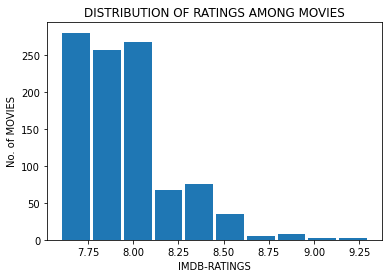

In [121]:
plt.hist(data.IMDB_Rating, rwidth=0.9)
plt.xlabel("IMDB-RATINGS")
plt.ylabel("No. of MOVIES")
plt.title("DISTRIBUTION OF RATINGS AMONG MOVIES");

THE ABOVE HISTOGRAM SHOWS THAT THIS IS A RIGHT SKEWED PLOT. WHICH MEANS THAT MAXIMUM NUMBER OF MOVIES HAVE RATINGS WHICH ARE LESS THAN THE OVERALL MEAN RATINGS.

Distribution of Average ratings among movies

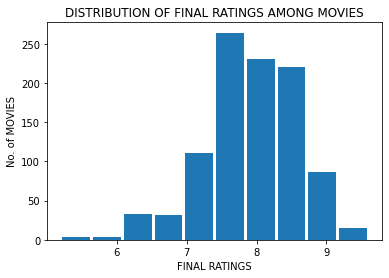

In [122]:
plt.hist(data.avg_rating, rwidth=0.9)
plt.xlabel("FINAL RATINGS")
plt.ylabel("No. of MOVIES")
plt.title("DISTRIBUTION OF FINAL RATINGS AMONG MOVIES");

THE ABOVE HISTOGRAM IS LEFT-SKEWED WHICH SHOWS THAT MAXIMUM NUMBER OF MOVIES RATINGS ARE BETWEEN 7.4 AND 8.6. THUS ACCORDING TO THIS RATING MAXIMUM NUMBER OF MOVIES ARE HAVING THEIR FINAL RATING HIGHER THAN THEIR OVERALL MEAN RATINGS.

Distribution of Running length among movies

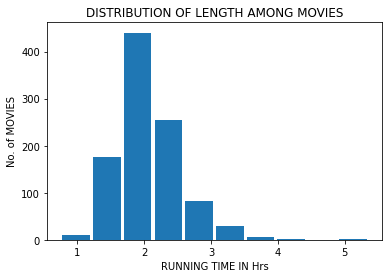

In [123]:
plt.hist(data.Time_hrs, rwidth=0.9)
plt.xlabel("RUNNING TIME IN Hrs")
plt.ylabel("No. of MOVIES")
plt.title("DISTRIBUTION OF LENGTH AMONG MOVIES");

FROM THE ABOVE HISTOGRAM WE CAN CONCLUDE THAT MAXIMUM MOVIES HAVE THEIR TOTAL RUNNING TIME BETWEEN 1.5 AND 2.5 HOURS. AS A RESULT OF WHICH THE GRAPH IS RIGHT SKEWED.

In [124]:
from numpy import corrcoef
import scipy.stats

To find correlation between number of votes and gross earnings

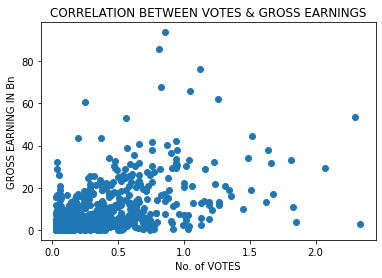

In [125]:
plt.scatter(data.No_of_Votes,data.Gross_bn);
plt.xlabel("No. of VOTES")
plt.ylabel("GROSS EARNING IN Bn")
plt.title("CORRELATION BETWEEN VOTES & GROSS EARNINGS");

In [135]:
data.Gross_bn.fillna(method= 'ffill',inplace= True)
r,p=scipy.stats.pearsonr(data.No_of_Votes,data.Gross_bn)
print("r=",r.round(2))
print("p=",p)

r= 0.48
p= 8.439022041118541e-60


Here as shown "r" co-efficient is positive thus it seems that both gross earnings and number of votes are having positive correlation. As a result, higher the number of votes higher will be the gross earnings. But still there are few outliers. The lower value of "r" represents the weak relations between both of them.

To find correlation between average ratings and gross earnings

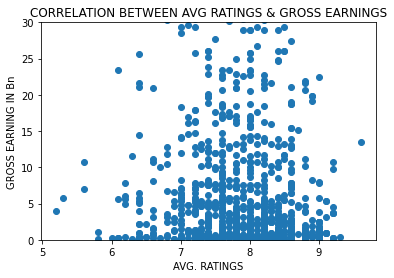

In [141]:
plt.scatter(data.avg_rating,data.Gross_bn)
plt.xlabel("AVG. RATINGS")
plt.ylabel("GROSS EARNING IN Bn")
plt.title("CORRELATION BETWEEN AVG RATINGS & GROSS EARNINGS");
plt.ylim(0,30);

In [139]:
r,p= scipy.stats.pearsonr(data.avg_rating,data.Gross_bn)
print("r=",r.round(2))
print("p=",p)

r= -0.06
p= 0.0705987125157692


Here,the value of "r" is negative as well as from the graph we can clearly observe that the number of outliers are very high. also the value of "r" is very close to 0. Thus, there is very weak correlation between both of them. This is because maximum number of movies irrespective of their earnings got the ratings between 7 & 9. As a result, gross earnings is not much dependent upon the ratings received. There may be many other factors on which gross earnings may be dependent like Genres of movies, category of the movie, actors and actress fame, number of votes and likes on social media, etc.

Correlation between running time and number of votes for the movies.

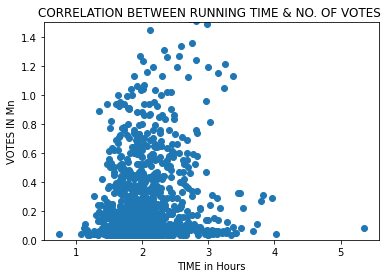

In [153]:
plt.scatter(data.Time_hrs,data.No_of_Votes)
plt.xlabel("TIME in Hours")
plt.ylabel("VOTES IN Mn")
plt.title("CORRELATION BETWEEN RUNNING TIME & NO. OF VOTES ");
plt.ylim(0,1.5);

In [154]:
r,p= scipy.stats.pearsonr(data.Time_hrs,data.No_of_Votes)
print("r=",r.round(2))
print("p=",p)

r= 0.17
p= 3.534095044605939e-08


Positive "r" value shows that the relation is positive but the value is very near to 0 which means they has a weak positive relation. This is because maximum number of people like to watch movies that are not more than 2.5 hours in length. we can clearly see here that for the running time more than 2.5 hrs, the number of votes are sharply reducing, while maximum votes goes to those movies which are approx 2 hours in length. There are always some exceptional cases due to which we can observe the outliers but those are may be for such movies that are exceptionally good in terms of star-cast, contents, visual effects, etc.